In [1]:
import warnings
warnings.filterwarnings('ignore')

<h1 style = "fontsize:400%;text-align:center;">QBUS3850: Time Series and Forecasting</h1>
<h2 style = "fontsize:300%;text-align:center;">Forecast Combination</h2>
<h3 style = "fontsize:200%;text-align:center;">Lecture Notes</h3>

<h2 style = "fontsize:300%;text-align:center;">Forecast Combination</h2>

- A game is to guess the number of jelly beans in a jar.
- While individiual guesses are wrong, the average of many guesses will be close to the answer.
- In forecasting we can improve forecasts by averaging over different models 
- The same principle works for expert judgements.

<img src="beans.jpeg" alt="beans" width="600"/>


# Wisdom of the crowd (of forecasters)

- In a seminal 1969 paper Bates and Granger propose forecast combination.
- Consider the case of two forecasts.
- Forecast quality measured by Mean Square Error of forecasts.
- They are able to show that
  - Combinination weights depend on variances and covariances of forecast errors.
  - The combined forecast is better than any individual forecast.

# The math

Let $\hat{y}_{1}$ and $\hat{y}_{2}$ be two forecasts, and $w$ be a combination weight. The combined forecast $\hat{y}_c$ is given by

$$\hat{y}_{c}=w\hat{y}_{1}+(1-w)\hat{y}_{2}$$

Also let $\sigma_1$ and $\sigma_2$ be the forecast error variances of the two forecasts respectvely.

$$\sigma^2_1 = E\left[(y-\hat{y}_{1})^2\right]\quad\textrm{and}\quad\sigma^2_2 = E\left[(y-\hat{y}_{2})^2\right]$$

This expectation is with respect to forecast errors (not in-sample errors).

# More detail

Each forecast is made at time $t+h$ using information at time $t$. The expectation is with respect to the conditional distribution of $\hat{y}_{t+h|t}$. For each forecast.

$$\sigma^2 = E_{y_{t+h|t}}\left[(y_{t+h}-\hat{y}_{t+h|t})^2\right]$$

If forecasts are unbiased $E_{t+h|t}\left[\hat{y}_{t+h|t}\right]=y_{t+h}$. This means the expected square error is given by

$$\sigma^2 = E_{y_{t+h|t}}\left[\left(\hat{y}_{t+h|t}-E_{t+h|t}[\hat{y}_{t+h|t}]\right)^2\right]$$

Each $sigma^2$ is the forecast error variance. From now on let's keep the notation simple.

# Expected value of combination


$$E\left[\hat{y}_{c}\right]=wE\left[\hat{y}_{1}\right]+(1-w)E\left[\hat{y}_{2}\right]$$

If forecasts are unbiased, then

$$E\left[\hat{y}_{c}\right]=wy+(1-w)y=y$$

Combinations of unbiased forecasts are also unbiased (if weights sum to one).

# Variance of combination

$$\begin{aligned}E\left[(\hat{y}_{c}-y)^2\right]&=E\left[(w\hat{y}_1+(1-w)\hat{y}_2-y)^2\right]\\&=E\left[(w\hat{y}_1+(1-w)\hat{y}_2-wy-(1-w)y)^2\right]\\&=E\left[\left(w(\hat{y}_{1}-y)+(1-w)(\hat{y}_{2}-y)\right)^2\right]\\&=E\left[w^2(\hat{y}_{1}-y)^2+2w(1-w)(\hat{y}_{1}-y)(\hat{y}_{2}-y)+(1-w)^2(\hat{y}_{2}-y)^2\right]\\&=w^2\sigma^2_1+2w(1-w)\rho\sigma_1\sigma_2+(1-w^2)\sigma_2^2\end{aligned}$$

Where $\rho$ is the correlation between forecasts. 



# Optimal Combination Weights

Minimising the above equation for $w$ gives the optimal weight

$$w^{(\textrm{opt})}=\frac{\sigma^2_2-\rho\sigma_1\sigma_2}{\sigma_1^2+\sigma_2^2+2\rho\sigma_1\sigma_2}$$

For the case of uncorrelated forecasts this simplifies to:

$$w^{(\textrm{opt})}=\frac{\sigma^2_2}{\sigma_1^2+\sigma_2^2}$$

It can be proven that the optimal combination weights have a smaller variance compared to any individual forecast.

# Your turn...

- When $\sigma_1$ is high is $w^{(\textrm{opt})}$ bigger or smaller? 
  - Does this make sense?
- When $\sigma_2$ is high is $w^{(\textrm{opt})}$ bigger or smaller? 
  - Does this make sense?
- When $\rho$ is high is $w^{(\textrm{opt})}$ bigger or smaller? 
  - Does this make sense?
  
  
  

# The general case

For more than two forecasts, the objective function is

$$\boldsymbol{w}^{(\textrm{opt})}=\underset{\mathbf{w}}{argmin}\,\mathbf{w}'\boldsymbol{\Sigma}\mathbf{w}\:\textrm{s.t}\:\boldsymbol{\iota}'\mathbf{w}=1$$

Where $\boldsymbol{\iota}$ is a column of 1's. This can be solved as

$$\boldsymbol{w}^{(\textrm{opt})}=\frac{{\boldsymbol{\Sigma^{-1}\iota}}}{\boldsymbol{\iota'\Sigma^{-1}\iota}}$$



# Estimating $\sigma_j$ and $\rho$

- In practice the forecast variances are not known and need to be estimated.
- For statistical models we have expressions for forecast variance, but this is not always available.
  - For example consider expert judgments
- As long as we have forecasts and true values  (e.g. via a rolling window), we can estimate $\sigma_j$ and $\rho$ and use these to calculate combination weights.

# Strategies (2 forecast case)

Let $\hat\sigma_1$ and $\hat\sigma_2$ be the mean square (forecast) errors. Let $T$ be the time at which we want to form combination weighs. methods include:

- $w_T=\frac{\hat\sigma_2}{\hat\sigma_1+\hat\sigma_2}$
- $w_T=\gamma w_{T-1}+(1-\gamma)\frac{\hat\sigma_2}{\hat\sigma_1+\hat\sigma_2}$

Alternative variances (and covariances) can be computed as weighted sums with higher weights for more recent errors

$$\tilde\sigma^2_1=\sum \alpha_t(y_t-\hat{y}_{1,t})^2$$

where $\alpha_t$ is increasing in $t$ and a similar expression is used to estimate the $\tilde\sigma^2_2$.

<h2 style = "fontsize:300%;text-align:center;">Forecast Combination Puzzle</h2>

# The puzzle

- The theory shows that equal weights (i.e. 1/K) is not guaranteed to be optimal.
- However years of forecasting practice and research have shown that equal weights often outperform so-called optimal weights.
- This is known as the *forecast combination puzzle*.
- There are several explanations of the puzzle.

# Explanation

- Recall from a few slides back, that to show combinations are unbiased

$$E\left[\hat{y}_{c}\right]=wE\left[\hat{y}_{1}\right]+(1-w)E\left[\hat{y}_{2}\right]$$

- This line of math assumes that $w$ is fixed. However as we have seen, it is often estimated from data.
- The need to estimate $w$ results in a bias in forecast combination.
- In constrast, equal weights are truly non-random.

# Visually

- The bottom curve shows the expected mean square error of combined forecasts against the value of the weight.
  - F is the optimal point
  - E is equal weights
- The top curve is higher due to randomness of weights.
  - R is the optimal point

<img src="puzzle.png" alt="puzzle" width="900"/>

Source: [Claeskens et al. (2016)](https://www.sciencedirect.com/science/article/abs/pii/S0169207016000327)

# General case uncorrelated forecasts

If forecasts are uncorrelated, then $\Sigma$ is diagonal and the weight is proportional to the inverse forecast error variance. For weight $j$ when there are $K$ forecasts in total

$$w_j=\frac{1/\sigma^2_j}{\sum\limits_{i=1}^K1/\sigma_k^2}$$

This provides a simple way of getting weights that does not rely on estimating covariances.

# Shrink to equal weights

Diebold and Shin (2019) propose using regularisation to shrink towards equal weights. Rewrite problem as a regression model

$y=w_1\hat{y}_1+w_2\hat{y}_2+w_3\hat{y}_3+\dots+w_k\hat{y}_K+\epsilon$

Rather than minimise

$RSS = \sum(y-w_1\hat{y}_1+w_2\hat{y}_2+w_3\hat{y}_3+\dots+w_k\hat{y}_K)^2$

Add a L1 or L2 penalty on w's.

# Shrink to equal weights

- Egalitarian Ridge

$$\mathbf{w}^{(er)}=\underset{\mathbf{w}}{argmin}\left(RSS+\sum\limits_{k=1}^K(w_k-(1/K))^2\right)$$

- Egalitarian Lasso

$$\mathbf{w}^{(el)}=\underset{\mathbf{w}}{argmin}\left(RSS+\sum\limits^K_{k=1}|w_k-(1/K)|\right)$$

<h2 style = "fontsize:300%;text-align:center;">Prediction Intervals</h2>

# Prediction intervals

- In the first lecture the importance of prediction intervals was discussed.
- The focus so far has been on point forecasts.
- Briefly discuss methods for when the forecast variance is constant over time.
- From next weeks onwards we consider models where the conditional variance changes over time.

# Forecast Variance

- For many methods, the forecast variance can be derived mathematically.
- For example for a stationary AR(1) the forecast variance for a two step ahead forecast is

$$V(\hat{Y}_{T+h}|Y_1,Y_2,\dots,Y_T)=(1+\phi^2+\phi^4+\dots+\phi^{2(h-1)})\sigma^2$$

- See predictive analytics notes (week 12, slide 43-45 for a derviation)
- For general ARMA processes we can derive results using the MA($\infty$) representation.

# Model free forecast

- How can we get the forecast variance in general (inc. for expert forecasts)?
$$\sigma^2_h=\frac{1}{T-K}\sum (\hat{y}_{t+h|t}-y_{t+h})^2$$
- Here $T$ is the number of forecasts $K$ is the number of parameters in a model (K=1 if there is not model)
- This can be done in-sample or out of sample.
- What is being ignored here is uncertainty around parameters 
  - This is usually small relative to uncertainty around the errors.

# Intervals under normality

- However, $\sigma^2_h$ is found, If errors are normally distributed, then the forecast and its variance provide all information about the distribution.
- In this case a 95% predicition interval can be found by taking 
$$\hat{y}_{t+h|t}\pm1.96\sigma_h$$
- Other 
- The Python package `statsmodels`implements prediction intervals assuming normality.

# Example

- Code below from week 4

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.api as smt
import matplotlib.pyplot as plt
dat = pd.read_csv('takeaway.csv')
dat['Month']=pd.to_datetime(dat['Month'])
dat['logTurnover']=np.log(dat['Turnover'])
res = sm.tsa.arima.model.ARIMA(dat['logTurnover'], order = (2,0,3),seasonal_order=(2,1,2,12),trend='c').fit()


/home/anastasios/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Prediction Intervals

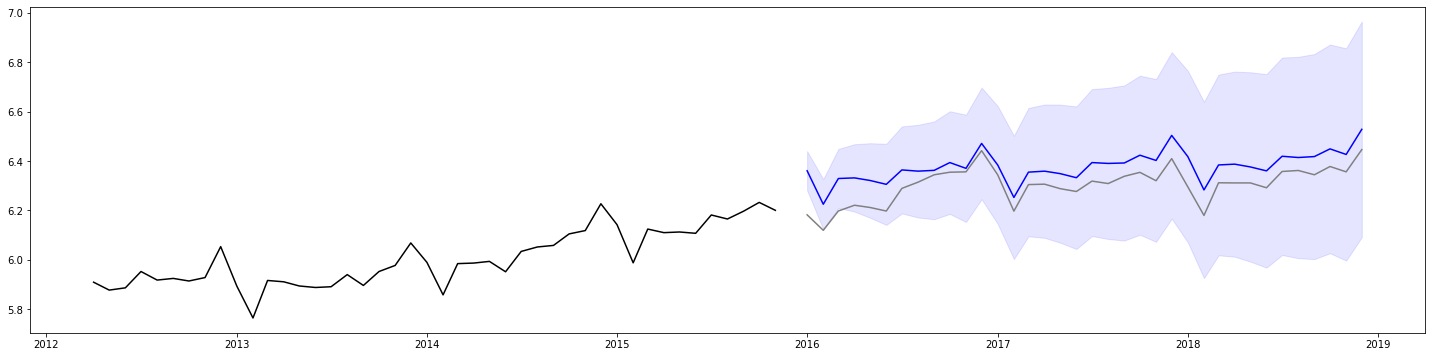

In [3]:
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(dat.iloc[360:404,0],dat.iloc[360:404,2],color='black')
fcast = res.get_forecast(36).summary_frame()
ax.plot(dat.iloc[405:,0],dat.iloc[405:,2],color='gray')
ax.plot(dat.iloc[405:,0],fcast['mean'],color='blue')
ax.fill_between(dat.iloc[405:,0], fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='blue', alpha=0.1);

# An MA(1)

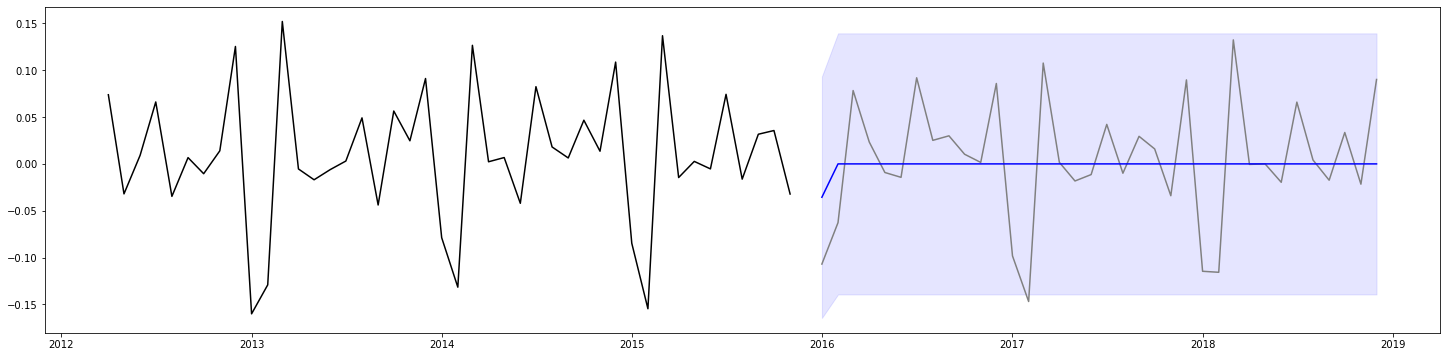

In [4]:
dat['dlogTurnover']=dat['logTurnover'].diff()
res = sm.tsa.arima.model.ARIMA(dat['dlogTurnover'], order = (0,0,1),trend='n').fit()
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(dat.iloc[360:404,0],dat.iloc[360:404,3],color='black')
fcast = res.get_forecast(36).summary_frame()
ax.plot(dat.iloc[405:,0],dat.iloc[405:,3],color='gray')
ax.plot(dat.iloc[405:,0],fcast['mean'],color='blue')
ax.fill_between(dat.iloc[405:,0], fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='blue', alpha=0.1);

# An AR(1)

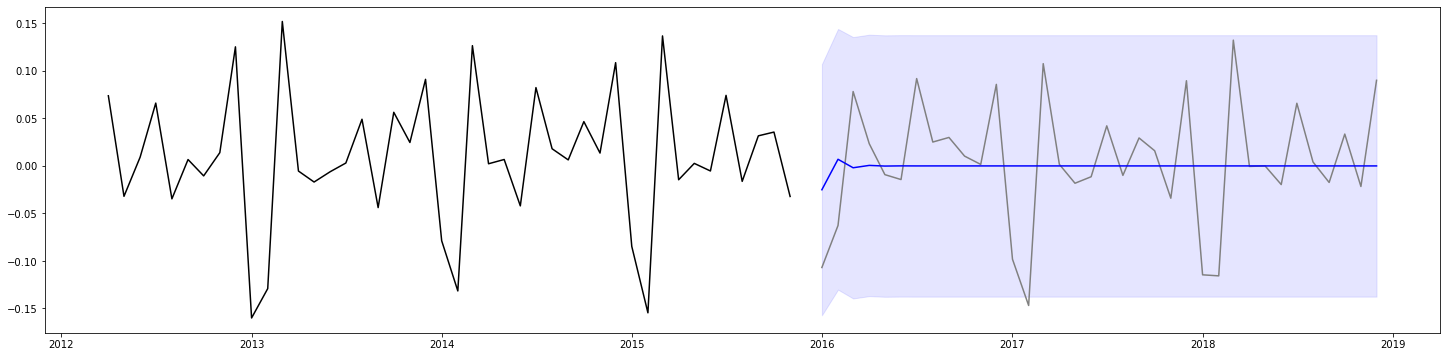

In [5]:
dat['dlogTurnover']=dat['logTurnover'].diff()
res = sm.tsa.arima.model.ARIMA(dat['dlogTurnover'], order = (1,0,0),trend='n').fit()
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(dat.iloc[360:404,0],dat.iloc[360:404,3],color='black')
fcast = res.get_forecast(36).summary_frame()
ax.plot(dat.iloc[405:,0],dat.iloc[405:,3],color='gray')
ax.plot(dat.iloc[405:,0],fcast['mean'],color='blue')
ax.fill_between(dat.iloc[405:,0], fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='blue', alpha=0.1);

# Conclusions

- For forecasts with trends, the prediction intervals flare out as $h$ increases.
  - Even small uncertainty in the trend can lead to much uncertainty far into the future.
- For stationary data/models, the prediction intervals do increase a little at first, but eventually stablise at a certain width
  - This is the unconditional variance.
- Understanding the intuition is as (if not more) important than knowingthe formulas.

<h2 style = "fontsize:300%;text-align:center;">Bootstrapping</h2>

# Beyond normality

- What if forecast errors are not normally distributed.
- In this case we can rely on simulation methods.
- Think of any model as

$$y_t=\hat{y}_{t|t-1}+e_t$$

- Assume $e_t$ are independently and identically distributed for all $t$.
- But we do not know the distribution of $e_t$

# Bootstrapping

- We do have a sample of $e_t$ for $t=1,2,3,\dots,T$ from our training data.
- This provides information about the distribution of errors.
- If we draw $e_t$ at random with replacement, this gives us a sample of potential 'future errors'.
- This leads to the following algorithm.

# Bootstrapping

For $b=1,2,3,B$

1. Form a one step ahead forecast $\hat{y}_{T+1|T}$
2. Sample a training error $e_{T+1}^{(b)}$ from $\left\{e_1,e_2,\dots,e_T\right\}$ at random
3. Set $\tilde{y}^{(b)}_{T+1}=\hat{y}_{T+1|T}+e_{T+1}^{(b)}$
4. Form a one step ahead forecast $\hat{y}_{T+2|T+1}$ as if $\tilde{y}^{(b)}_{T+1}$ were the value of $y_{T+1}$
5. Sample a training error $e_{T+2}^{(b)}$ from $\left\{e_1,e_2,\dots,e_T\right\}$ at random
6. Set $\tilde{y}^{(b)}_{T+2}=\hat{y}_{T+1|T}+e_{T+2}^{(b)}$
7. Repeat for $H$ steps.

Gives $B$ future paths $\tilde{y}^{(b)}_{T+1},\tilde{y}^{(b)}_{T+2},\dots,\tilde{y}^{(b)}_{T+H}$

# Example

- Consider the AR1 we just fit to differenced log Turnover.
- Histogram of residuals shows a heavy left tail.

(array([  5.,  15.,  15.,  21.,  64., 139.,  99.,  61.,  16.,   5.]),
 array([-0.22226951, -0.18148687, -0.14070422, -0.09992158, -0.05913894,
        -0.01835629,  0.02242635,  0.06320899,  0.10399164,  0.14477428,
         0.18555692]),
 <BarContainer object of 10 artists>)

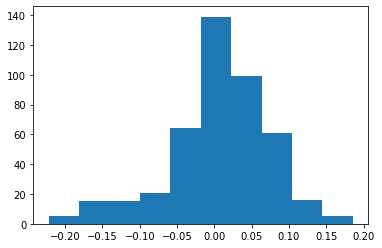

In [6]:
resid = dat['dlogTurnover']-res.fittedvalues
resid = resid[1:]
plt.hist(resid)



# Bootstrapping Code

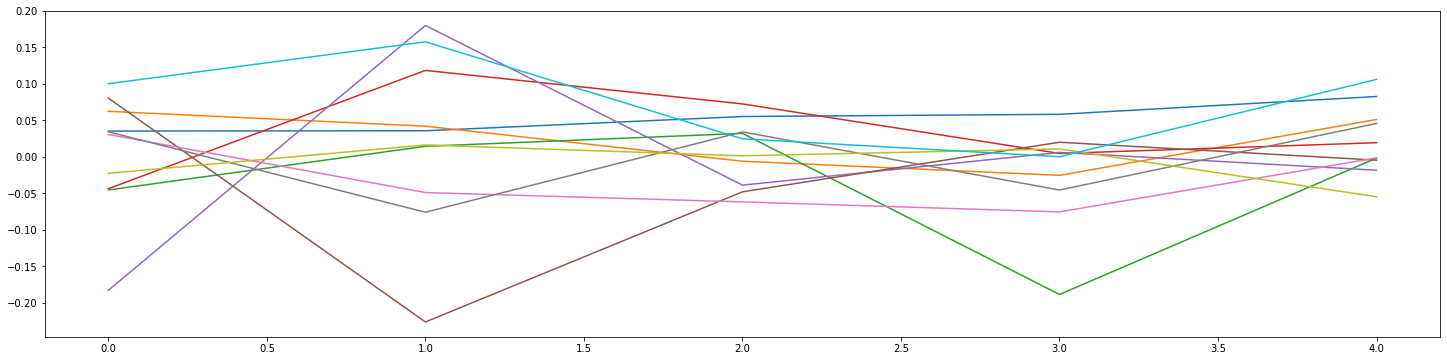

In [7]:
phi = res.arparams
H=5
B=10
ytilde=np.zeros((H,B))
for b in range(0,B):
    onestep = res.forecast(1)
    for h in range(0,H):
        eb = np.random.choice(resid)
        ytilde[h,b] = onestep+eb
        onestep=phi*ytilde[h,b]

fig, ax = plt.subplots(figsize=(25,6))
for b in range(0,B):
    ax.plot(np.arange(0,H),ytilde[:,b])

# Prediction intervals

- To find prediction intervals find percentiles

In [8]:
H=36
B=100
ytilde=np.zeros((H,B))
for b in range(0,B):
    onestep = res.forecast(1)
    for h in range(0,H):
        eb = np.random.choice(resid)
        ytilde[h,b] = onestep+eb
        onestep=phi*ytilde[h,b]
yhat = np.apply_along_axis(np.mean,1,ytilde)
yint = np.apply_along_axis(np.quantile,1,ytilde,q=(0.025,0.975))


# Plot


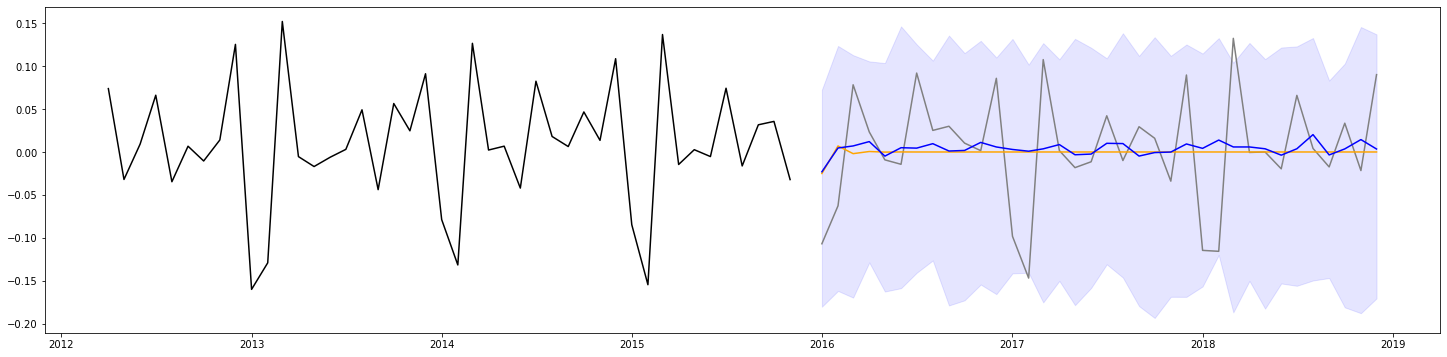

In [9]:
fig, ax = plt.subplots(figsize=(25,6))
ax.plot(dat.iloc[360:404,0],dat.iloc[360:404,3],color='black')
fcast = res.get_forecast(36).summary_frame()
ax.plot(dat.iloc[405:,0],dat.iloc[405:,3],color='gray')
ax.plot(dat.iloc[405:,0],fcast['mean'],color='orange')
ax.plot(dat.iloc[405:,0],yhat,color='blue')
ax.fill_between(dat.iloc[405:,0], yint[:,0], yint[:,1], color='blue', alpha=0.1);

# Conclusions

- Bootstrapping does add some noise into the forecasts (and intervals).
- Choose a large number of bootstrap samples.
- Notice that the prediction interval is now asymmetric.
- Otherwise the intervals have similar properties (stabilise at unconditional stationary distribution).
- Simulation can be useful for finding prediction intervals for model averages.

# Evaluating intervals

- To evaluate a $100\times(1-\alpha)$% prediction intervals we can use the Winkler score

$$W=\left\{\begin{array}{l}(u-l)+\frac{2}{\alpha}(l-y)\:\text{if}\: y<l\\
(u-l)\quad\quad\quad\quad\:\:\text{if} \:l<y<u\\
(u-l)+\frac{2}{\alpha}(y-u)\:\text{if}\: y>u\end{array}\right.$$

- Here $u$ is the upper interval, $l$ is the lower interval, $y$ is the observed value and $\alpha$.
- Rewards a narrow interval, but penalises falling outside the interval.

# Wrap up

- Understand the importance of model averaging.
- Know how to form prediction intervals.
- Can use bootstrapping both for single models but also to bring these ideas together.
- All of this assumes that only the conditional mean changes over time.
- From next week, we will also allow the conditional variance to change over time.